In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(mtrain_images, mtrain_labels), (mtest_images, mtest_labels) = mnist.load_data()
(ftrain_images, ftrain_labels), (ftest_images, ftest_labels) = fmnist.load_data()

### Data Exploration

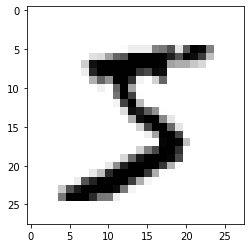

In [4]:
# Mnist example

plt.imshow(mtrain_images[0], cmap=plt.cm.binary)

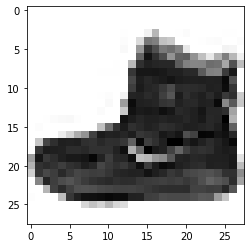

In [5]:
# Fmnist example

plt.imshow(ftrain_images[0], cmap=plt.cm.binary)

### Normalization

In [6]:
# Mnist Normalizarion

mtrain_images = tf.keras.utils.normalize(mtrain_images, axis=1)
mtest_images = tf.keras.utils.normalize(mtest_images, axis=1)

In [7]:
# Fmnist Normalization

ftrain_images = tf.keras.utils.normalize(ftrain_images, axis=1)
ftest_images = tf.keras.utils.normalize(ftest_images, axis=1)

### Model (Fully connected) - mnist

In [10]:

m_model = Sequential()
m_model.add(Flatten())
m_model.add(Dense(128, activation=tf.nn.relu))
m_model.add(Dense(128, activation=tf.nn.relu))
m_model.add(Dense(10, activation=tf.nn.softmax))


m_model.compile(optimizer= 'adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

m_model.fit(mtrain_images, mtrain_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.4672 - accuracy: 0.8619
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1042 - accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0712 - accuracy: 0.9781
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0493 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0373 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0291 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0215 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0181 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 27s 15ms/

In [11]:
mval_loss, mval_acc = m_model.evaluate(mtest_images, mtest_labels)
print('\nTest accuracy:', mval_acc)

313/313 [==============================] - 5s 14ms/step - loss: 0.1324 - accuracy: 0.9690

Test accuracy: 0.968999981880188


### saving model & prediction

In [12]:
m_model.save("mymnist.model")

INFO:tensorflow:Assets written to: mymnist.model/assets


In [13]:
mnist_new = tf.keras.models.load_model("mymnist.model")
preds = mnist_new.predict([mtest_images])

In [12]:
# Probability distributions
print(preds)

[[1.4010655e-18 5.2798162e-14 2.0769191e-09 ... 1.0000000e+00
  2.7198092e-13 2.5247553e-14]
 [1.9062997e-16 1.2202787e-08 1.0000000e+00 ... 1.6780349e-16
  1.9971630e-13 2.0099856e-23]
 [6.2091274e-12 9.9999952e-01 5.1336024e-09 ... 4.4141674e-07
  4.1632315e-08 1.5263675e-12]
 ...
 [8.3352352e-14 3.7320527e-10 7.5374507e-12 ... 1.1534747e-07
  5.5395335e-06 1.6953195e-06]
 [1.0170631e-13 4.8168822e-14 3.3325402e-16 ... 5.3742538e-11
  8.1344809e-10 5.5145164e-19]
 [2.4074993e-08 3.9696829e-11 2.6325247e-13 ... 3.0401336e-15
  6.6887281e-12 2.7896834e-18]]


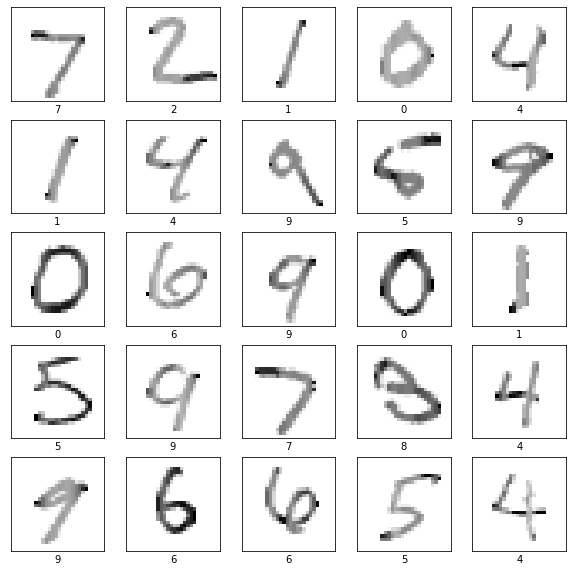

In [14]:
# check predictions --- TA DA :D

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mtest_images[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(preds[i]))
plt.show()

### Model (fully connected) - fashion mnist

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

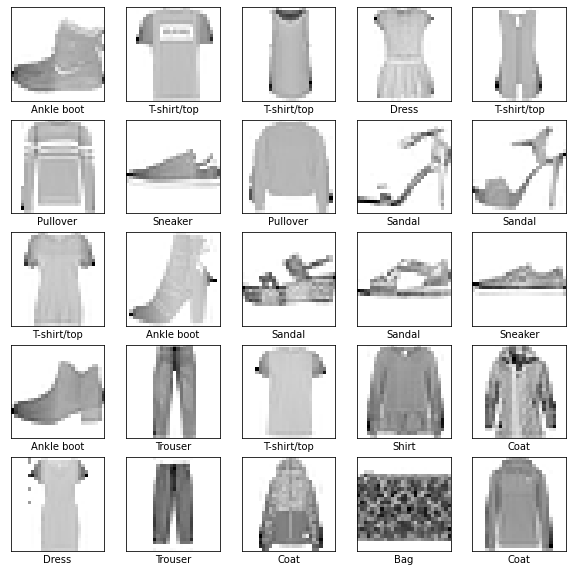

In [15]:
# check and verify class names - images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ftrain_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[ftrain_labels[i]])
plt.show()

In [16]:
f_model = Sequential()
f_model.add(Flatten(input_shape=(28, 28)))
f_model.add(Dense(128, activation=tf.nn.relu))
f_model.add(Dense(10))

f_model.compile(optimizer= 'adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

f_model.fit(ftrain_images, ftrain_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6586 - accuracy: 0.7712
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3845 - accuracy: 0.8618
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3371 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2887 - accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2760 - accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9045
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2435 - accuracy: 0.9098
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2370 - accuracy: 0.9125
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.224

In [17]:
fval_loss, fval_acc = f_model.evaluate(ftest_images, ftest_labels)
print('\nTest accuracy:', fval_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8784

Test accuracy: 0.8784000277519226


### Saving model & predictions

In [18]:
f_model.save("myfmnist.model")

INFO:tensorflow:Assets written to: myfmnist.model/assets


In [19]:
fmnist_new = tf.keras.models.load_model("myfmnist.model")
f_preds = mnist_new.predict([ftest_images])

In [20]:
# Probability distributions
f_preds

array([[7.6168544e-18, 2.6687408e-09, 1.0000000e+00, ..., 5.8972399e-19,
        1.6935766e-14, 2.1553332e-28],
       [6.1756466e-04, 2.7785163e-05, 8.1997197e-05, ..., 2.9004285e-08,
        2.4681287e-03, 3.3265346e-06],
       [9.9927217e-01, 1.6952105e-09, 2.2903841e-04, ..., 3.8309204e-07,
        2.5939631e-05, 2.5257011e-06],
       ...,
       [4.2973639e-05, 4.1270076e-07, 2.9707799e-04, ..., 2.3669843e-07,
        3.7860946e-08, 1.9532166e-08],
       [2.3132334e-05, 7.3324446e-07, 3.7322837e-04, ..., 6.7680662e-07,
        5.3423077e-01, 5.9177978e-06],
       [1.4988741e-05, 4.3709814e-09, 9.9998224e-01, ..., 9.3225664e-16,
        1.9928984e-07, 4.3144100e-16]], dtype=float32)

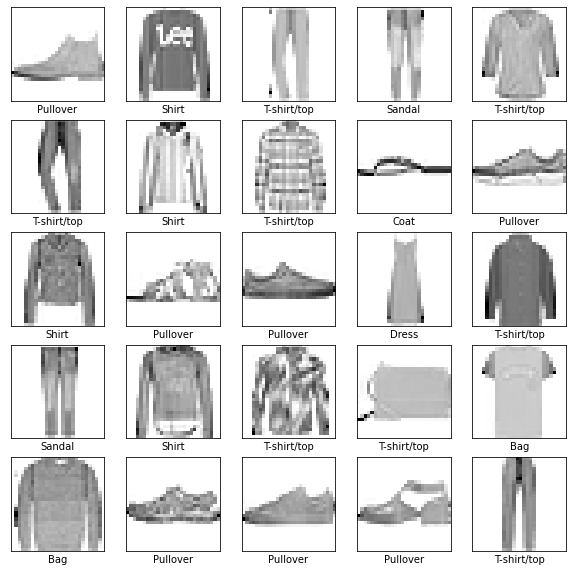

In [21]:
#check the predictions

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ftest_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(f_preds[i])])
plt.show()